In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
%matplotlib inline

In [3]:
data_usa = pd.read_excel("usa.xlsx", sheetname="USA by Place of birth", skiprows=20, skip_footer=2)

In [4]:
data_usa.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..


### The data needs a lot of cleaning and wrangling.

In [5]:
data_usa.drop(["Type", "Coverage", "AREA", "REG", "RegName", "DEV"], axis=1, inplace=True)

data_usa.head()

,OdName,AreaName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,Europe,More developed regions,2,3,2,1,0,0,1,...,..,..,..,..,..,..,..,..,..,..


In [6]:
data_usa.rename(columns={"OdName": "Country", "AreaName": "Continent"}, inplace=True)

### Majority of the immigrants came from less developed regions. There is no surprise.

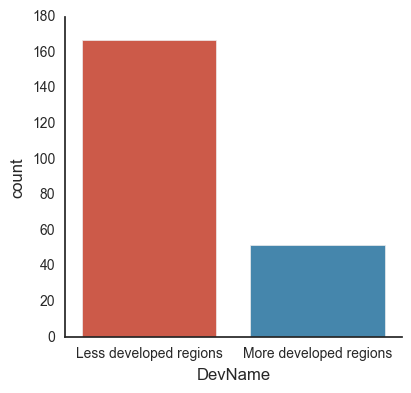

In [7]:
with sns.axes_style("white"):
    sns.factorplot("DevName", data=data_usa, kind="count")

### A more detailed view on the distribution of the regions.

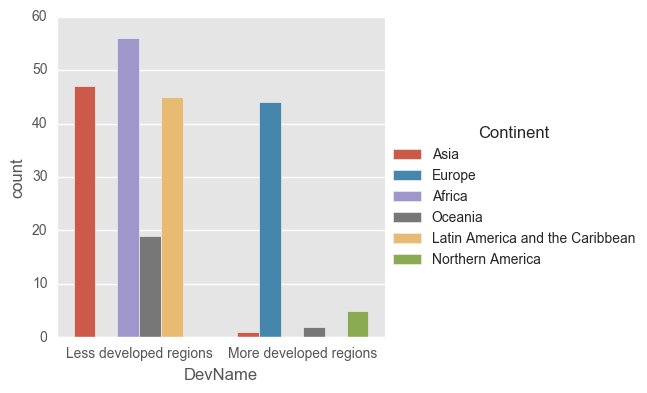

In [8]:
sns.factorplot("DevName", data=data_usa, kind="count", hue="Continent")

In [9]:
data_usa.drop(["Continent", "DevName"], axis=1, inplace=True)
data_usa.set_index("Country", inplace=True)

In [10]:
def plotcountry(country):
    data=data_usa.loc[country]
    plt.plot(data.index, data.values)

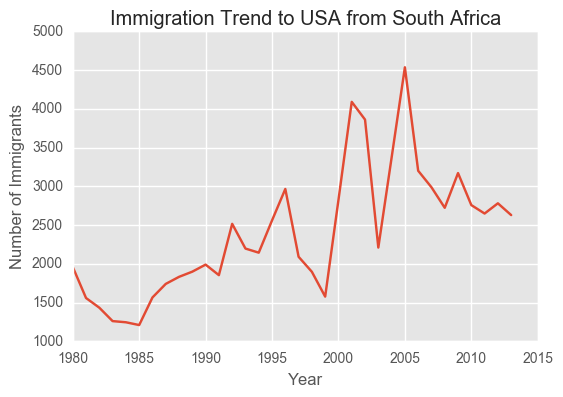

In [11]:
plotcountry("South Africa")
plt.title('Immigration Trend to USA from South Africa')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

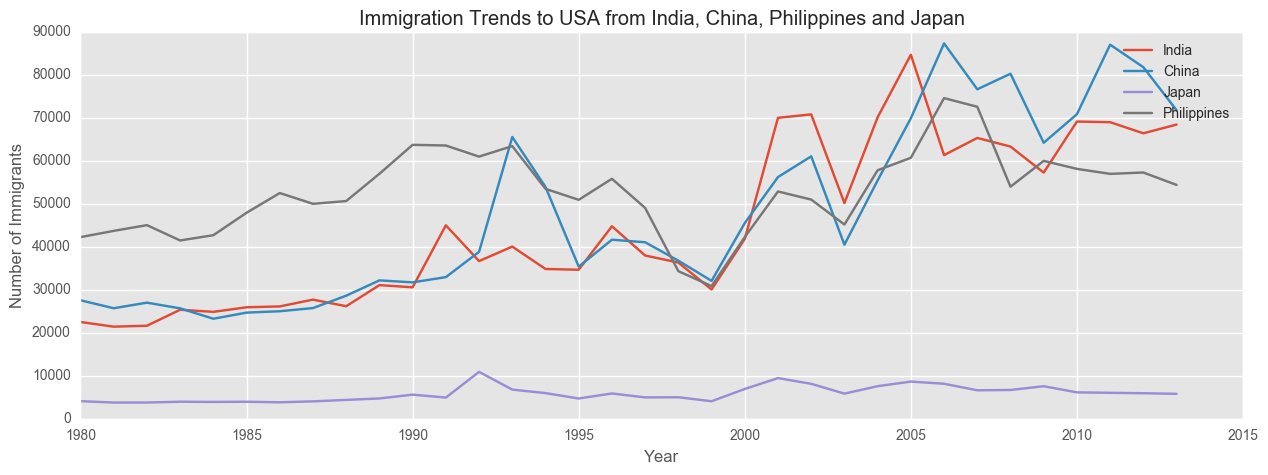

In [12]:
plt.figure(figsize=(15,5))

countries=["India", "China", "Japan", "Philippines"]

for country in countries:
    plotcountry(country)
plt.legend(countries)
plt.title("Immigration Trends to USA from India, China, Philippines and Japan")
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

### I want to get the top 5 countries by the total number of people that immigrate to US from 1980 to 2013. Here it is.

In [13]:
df1 = data_usa.apply(pd.to_numeric, errors='coerce')

In [14]:
df1["Total"]=df1.sum(axis=1)

In [15]:
df1.sort_values(by="Total", ascending=False, inplace=True)

In [16]:
df1.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028.0,6078548.0
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446.0,1798872.0
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798.0,1625912.0
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458.0,1533776.0
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101.0,1261426.0


### Then plot them.

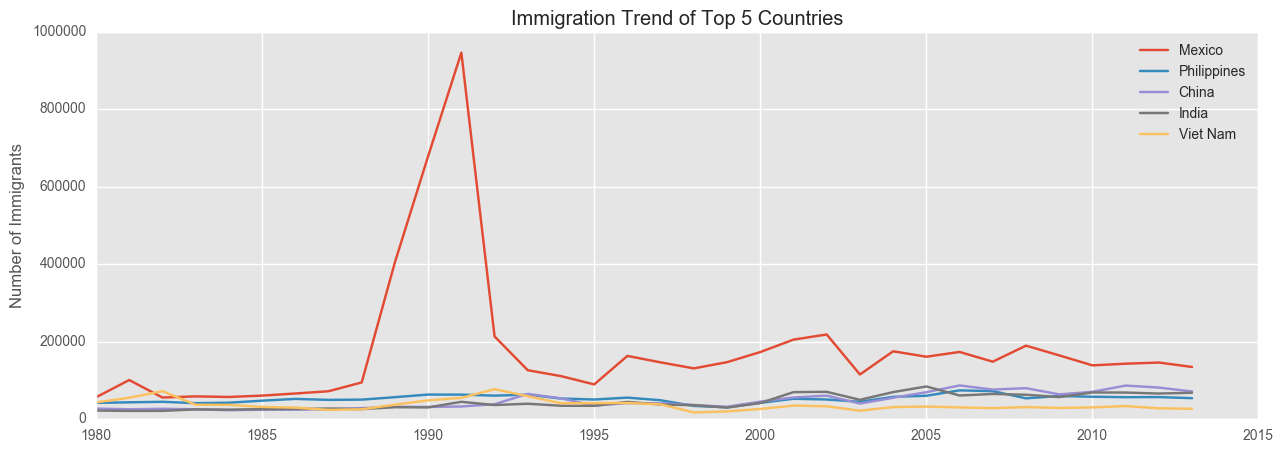

In [17]:
plt.figure(figsize=(15,5))

countries=["Mexico", "Philippines", "China", "India", "Viet Nam"]

for country in countries:
    plotcountry(country)
plt.legend(countries)
plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of Immigrants")

### In order to produce a stacked plot, I need to transpose the table.

In [18]:
df1=df1.drop(["Total"], axis=1)

In [19]:
variants = df1.head().transpose()

In [20]:
variants.head()

Country,Mexico,Philippines,China,India,Viet Nam
1980,56680.0,42316.0,27651.0,22607.0,43483.0
1981,101268.0,43772.0,25803.0,21522.0,55631.0
1982,56106.0,45102.0,27100.0,21738.0,72553.0
1983,59079.0,41546.0,25777.0,25451.0,37560.0
1984,57557.0,42768.0,23363.0,24964.0,37236.0


In [21]:
from pylab import rcParams
rcParams["figure.figsize"] = 15,4

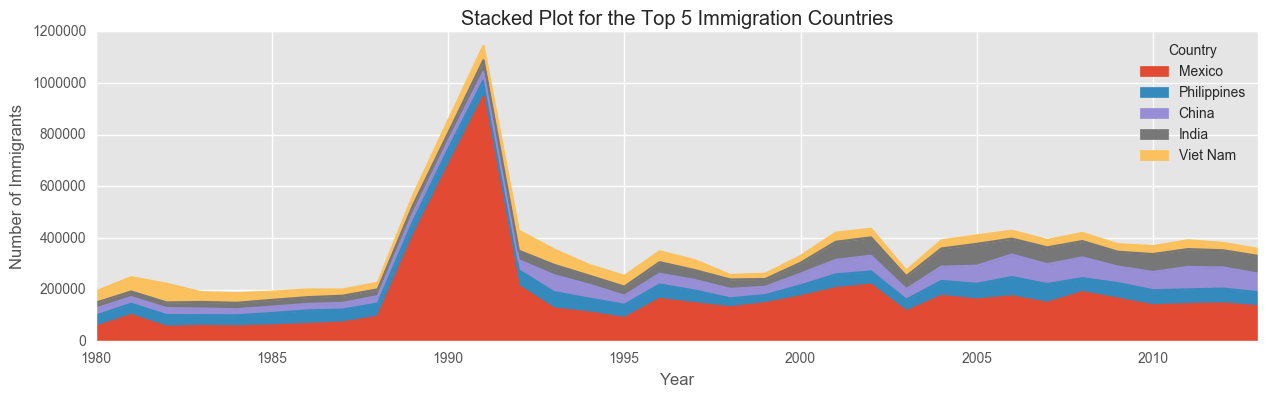

In [22]:
variants.plot.area();
plt.title("Stacked Plot for the Top 5 Immigration Countries")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

### Then back to the unstacked plot.

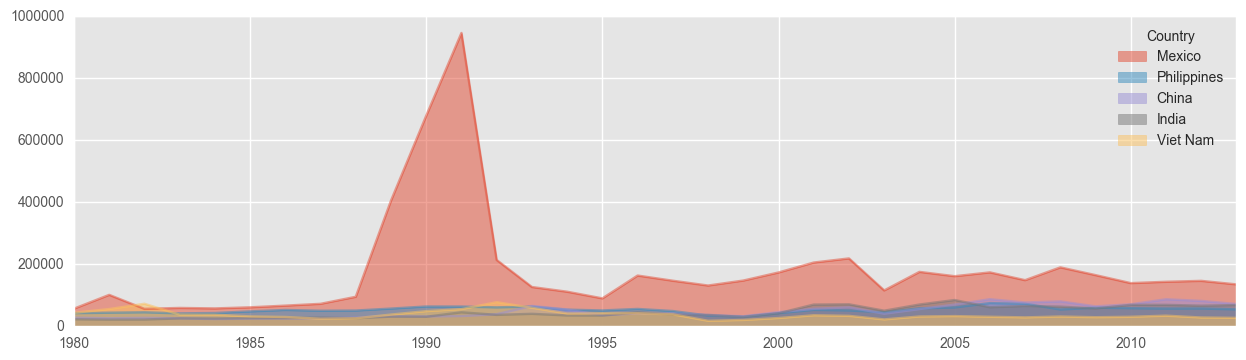

In [23]:
variants.plot.area(stacked=False);

In [24]:
data_usa.columns=list(map(str, data_usa.columns))
years=list(map(str, range(1980, 2014)))

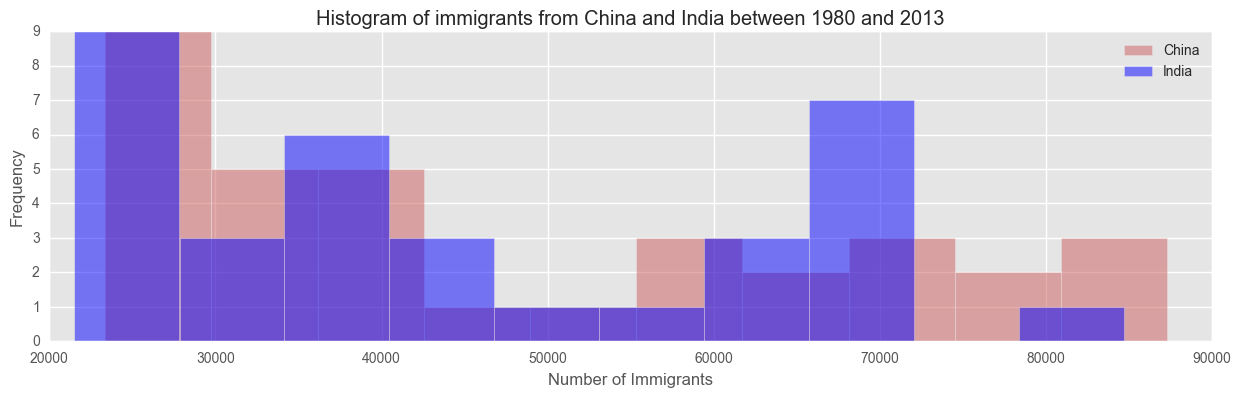

In [25]:
data_usa.loc["China", years].plot(kind='hist', color='indianred', alpha=0.5)
data_usa.loc["India", years].plot(kind='hist', color='Blue', alpha=0.5)
plt.legend()
plt.title("Histogram of immigrants from China and India between 1980 and 2013")
plt.xlabel('Number of Immigrants')

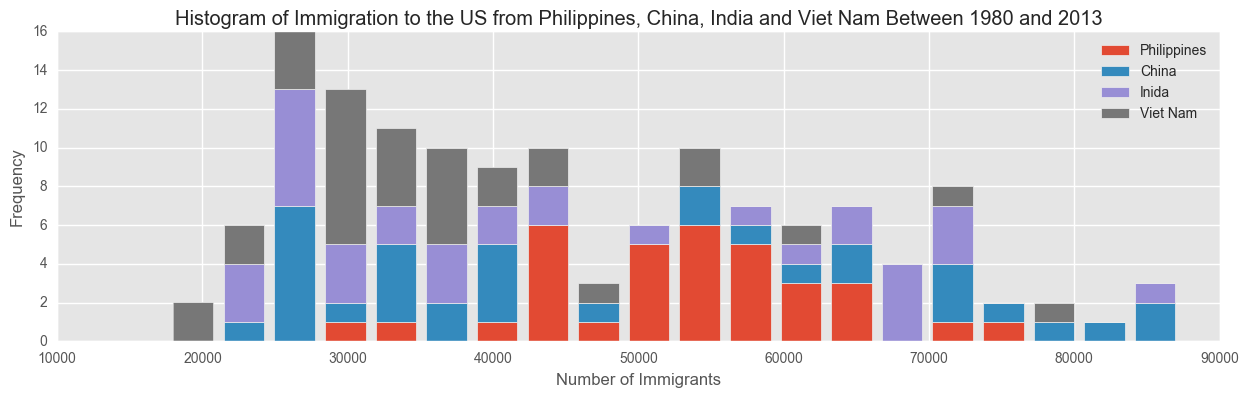

In [26]:
plt.figure()
plt.hist([data_usa.loc["Philippines", years], data_usa.loc["China", years], 
          data_usa.loc["India", years], data_usa.loc["Viet Nam", years]], bins=20, stacked=True, 
         label=["Philippines", "China", "Inida", "Viet Nam"])
plt.legend(loc="upper right")
plt.title('Histogram of Immigration to the US from Philippines, China, India and Viet Nam Between 1980 and 2013')
plt.ylabel('Frequency')
plt.xlabel('Number of Immigrants')
plt.show()

### Thank you for visiting!

Notebook created by: [Susan Li](https://www.linkedin.com/in/susanli/)